### 1

Seien zwei Funktionen gegeben durch
$$f(x,y)=x^{3}+3x^{2}y−x^{2}+3xy^{2}−2xy+y^{3}−y^{2}$$
$$g(x,y)=x^{2}+y^{2}$$

mit $x,y∈C$. Geben Sie zuerst $f$ vereinfacht (faktorisiert) aus. 
Lösen Sie dann das Gleichungssystem $f(x,y)=0, g(x,y)=0$ und geben Sie die Lösungsmenge aus. 
Stellen Sie weiters die zweiten partiellen Ableitungen in der *Hesse-Matrix* von $f$ dar und geben Sie diese aus. 
Eine *Hesse-Matrix* $H$ ist gegeben durch

$$ H = \begin{pmatrix} f_{xx} & f_{xy} \\ f_{yx} & f_{yy} \end{pmatrix}$$

wobei $f_{xx}$ einfach bedeutet, dass die Ableitung von $f$ nach $x$ nochmals nach $x$ abgeleitet wird (also die 2. Ableitung nach $x$ gebildet wird), $f_{xy}$ dass die 1.Ableitung von $f$ nach $x$ danach nach $y$ abgeleitet wird, etc. 

In [1]:
from sympy import *

In [2]:
x,y = symbols('x y')
f = x**3 + 3*x**2*y - x**2 + 3*x*y**2 - 2*x*y + y**3 - y**2
g = x**2 + y**2

In [3]:
f

x**3 + 3*x**2*y - x**2 + 3*x*y**2 - 2*x*y + y**3 - y**2

In [4]:
g

x**2 + y**2

In [5]:
f.factor()

(x + y)**2*(x + y - 1)

In [6]:
solve(f)

[{x: -y}, {x: 1 - y}]

In [9]:
solve([x**3 + 3*x**2*y - x**2 + 3*x*y**2 - 2*x*y + y**3 - y**2, x**2 + y**2],[x,y])

[(0, 0), (1/2 - I/2, 1/2 + I/2), (1/2 + I/2, 1/2 - I/2)]

In [8]:
solve([f,g],[x,y])

[(0, 0), (1/2 - I/2, 1/2 + I/2), (1/2 + I/2, 1/2 - I/2)]

In [8]:
f

x**3 + 3*x**2*y - x**2 + 3*x*y**2 - 2*x*y + y**3 - y**2

In [9]:
fxx = diff(f,x,2)
fxx

2*(3*x + 3*y - 1)

In [10]:
fxy = diff(f,x,y)
fxy

2*(3*x + 3*y - 1)

In [11]:
fyx = diff(f,y,x)
fyx

2*(3*x + 3*y - 1)

In [12]:
fyy = diff(f,y,2)
fyy

2*(3*x + 3*y - 1)

In [13]:
H = Matrix([ [fxx,fxy],[fyx,fyy] ])
H

Matrix([
[2*(3*x + 3*y - 1), 2*(3*x + 3*y - 1)],
[2*(3*x + 3*y - 1), 2*(3*x + 3*y - 1)]])

In [14]:
from IPython.display import display, Math, Latex

In [16]:
display(Latex(
    r'''$ H = \begin{pmatrix} 
    {%s} & {%s} \\
    {%s} & {%s}
    \end{pmatrix}$''' % (H[0,0], fxy, fyx, fyy) )
       )

<IPython.core.display.Latex object>

In [17]:
# 위에꺼 이쁘게 안되남????????????????????

### 2-a)
Eine $n×n$ tridiagonale **Toeplitz-Matrix** hat die Form
$$ M = \begin{pmatrix}
a & c & 0 & \cdots & 0 \\
b & a & c & \ddots & \vdots \\
0 & b & \ddots & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & c \\
0 & \cdots & 0 & b & a
\end{pmatrix} $$


Schreiben Sie eine Funktion, die eine solche $n×n$ Matrix für eine beliebige Größe $n$ und Variablen $a,b,c$ zurückgibt.

In [3]:
import numpy as np
from sympy import *

a,b,c = symbols('a b c')

def tm(n):
    m = [ [a,c] + [0]*(n-2) ]
    
    for i in range(n-2):
        m1= [0]*i + [b,a,c] +[0]*(n-i-3)
        m.append(m1)
        
    m2 = [0]*(n-2) +[b,a]
    m.append(m2)
        
    return Matrix(m)

In [19]:
tm(5)

Matrix([
[a, c, 0, 0, 0],
[b, a, c, 0, 0],
[0, b, a, c, 0],
[0, 0, b, a, c],
[0, 0, 0, b, a]])

In [20]:
tm(7)

Matrix([
[a, c, 0, 0, 0, 0, 0],
[b, a, c, 0, 0, 0, 0],
[0, b, a, c, 0, 0, 0],
[0, 0, b, a, c, 0, 0],
[0, 0, 0, b, a, c, 0],
[0, 0, 0, 0, b, a, c],
[0, 0, 0, 0, 0, b, a]])

Geben Sie die Matrix für verschiedene $n$ aus und vergleichen Sie die Standardausgabe mit jener Ausgabe, die Sie erhalten, wenn Sie `display()` aus dem Modul `IPython.display` verwenden. 

In [21]:
from IPython.display import display

for n in range(3,7):
    print(f'Toeplitz-Matrix mit n={n}')
    print(tm(n))
    display(tm(n))
    print('--------------------------')

Toeplitz-Matrix mit n=3
Matrix([[a, c, 0], [b, a, c], [0, b, a]])


Matrix([
[a, c, 0],
[b, a, c],
[0, b, a]])

--------------------------
Toeplitz-Matrix mit n=4
Matrix([[a, c, 0, 0], [b, a, c, 0], [0, b, a, c], [0, 0, b, a]])


Matrix([
[a, c, 0, 0],
[b, a, c, 0],
[0, b, a, c],
[0, 0, b, a]])

--------------------------
Toeplitz-Matrix mit n=5
Matrix([[a, c, 0, 0, 0], [b, a, c, 0, 0], [0, b, a, c, 0], [0, 0, b, a, c], [0, 0, 0, b, a]])


Matrix([
[a, c, 0, 0, 0],
[b, a, c, 0, 0],
[0, b, a, c, 0],
[0, 0, b, a, c],
[0, 0, 0, b, a]])

--------------------------
Toeplitz-Matrix mit n=6
Matrix([[a, c, 0, 0, 0, 0], [b, a, c, 0, 0, 0], [0, b, a, c, 0, 0], [0, 0, b, a, c, 0], [0, 0, 0, b, a, c], [0, 0, 0, 0, b, a]])


Matrix([
[a, c, 0, 0, 0, 0],
[b, a, c, 0, 0, 0],
[0, b, a, c, 0, 0],
[0, 0, b, a, c, 0],
[0, 0, 0, b, a, c],
[0, 0, 0, 0, b, a]])

--------------------------


### 2-b)
Berechnen Sie $M∗M^{T}$ und $M^{T}∗M$ und stellen Sie fest, welche Bedingung erfüllt werden muss, sodass die Ergebnisse gleich sind. 

In [12]:
for n in(3,4):
    M = tm(n)
    Mt = M.T

    print(f'n={n}')
    display(M*Mt,Mt*M)

n=3


Matrix([
[a**2 + c**2,          a*b + a*c,         b*c],
[  a*b + a*c, a**2 + b**2 + c**2,   a*b + a*c],
[        b*c,          a*b + a*c, a**2 + b**2]])

Matrix([
[a**2 + b**2,          a*b + a*c,         b*c],
[  a*b + a*c, a**2 + b**2 + c**2,   a*b + a*c],
[        b*c,          a*b + a*c, a**2 + c**2]])

n=4


Matrix([
[a**2 + c**2,          a*b + a*c,                b*c,           0],
[  a*b + a*c, a**2 + b**2 + c**2,          a*b + a*c,         b*c],
[        b*c,          a*b + a*c, a**2 + b**2 + c**2,   a*b + a*c],
[          0,                b*c,          a*b + a*c, a**2 + b**2]])

Matrix([
[a**2 + b**2,          a*b + a*c,                b*c,           0],
[  a*b + a*c, a**2 + b**2 + c**2,          a*b + a*c,         b*c],
[        b*c,          a*b + a*c, a**2 + b**2 + c**2,   a*b + a*c],
[          0,                b*c,          a*b + a*c, a**2 + c**2]])

##### Bedingung : b^2 = c^2 <br> Also...b =-c oder b = +c

In [13]:
M*Mt == Mt*M

False

In [14]:
M*Mt - Mt*M

Matrix([
[-b**2 + c**2, 0, 0,           0],
[           0, 0, 0,           0],
[           0, 0, 0,           0],
[           0, 0, 0, b**2 - c**2]])

 Geben Sie dann eine tridiagonale *Toeplitz-Matrix* der Größe $n=5$ mit Zahlenwerten aus, indem Sie eine allgemeine *Toeplitz-Matrix* erstellen und konkrete Werte für die Symbole übergeben: 
$a,b,c$ sollen hier auf zwei Nachkommastellen gerundete Zufallszahlen aus $[−1,1]$ sein. 

In [5]:
import random
 
number = []
 
while len(number)<3:
    num = round(random.uniform(-1,1),2)
    if num not in number:  # 새로운 수가 중복이 아니면, 
        number.append(num)
print(number)

[-0.42, 0.45, -0.92]


In [9]:
# a = number[0]
# b = number[1]
# c = number[2]

tm(5).subs({a:number[0], b:number[1], c:number[2]})

Matrix([
[-0.42, -0.92,     0,     0,     0],
[ 0.45, -0.42, -0.92,     0,     0],
[    0,  0.45, -0.42, -0.92,     0],
[    0,     0,  0.45, -0.42, -0.92],
[    0,     0,     0,  0.45, -0.42]])

In [21]:
M = tm(5)
Mt = tm(5).transpose() # Mt =M.transpose()

M*Mt-Mt*M

Matrix([
[-b**2 + c**2, 0, 0, 0,           0],
[           0, 0, 0, 0,           0],
[           0, 0, 0, 0,           0],
[           0, 0, 0, 0,           0],
[           0, 0, 0, 0, b**2 - c**2]])

In [22]:
M1 = M.subs({a:round(random.uniform(-1,1),2), b :-2, c : 2})  # b :-2, c : 2
M1t = M1.transpose()

M1*M1t-M1t*M1

Matrix([
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0]])

In [23]:
M2 = M.subs({a:round(random.uniform(-1,1),2), b :2, c : -2})  # b :2, c : -2
# M2t = M2.T = M2.transpose()

M2*M2.T-M2.T*M2

Matrix([
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0]])

Testen Sie nun Ihre Feststellung mit eingesetzten Zahlenwerten.

In [7]:
# b = -c

tm(5).subs({a:number[0], b:2, c:-2})

Matrix([
[-0.42,    -2,     0,     0,     0],
[    2, -0.42,    -2,     0,     0],
[    0,     2, -0.42,    -2,     0],
[    0,     0,     2, -0.42,    -2],
[    0,     0,     0,     2, -0.42]])

In [11]:
M*N - N*M

Matrix([
[-b**2 + c**2, 0, 0,           0],
[           0, 0, 0,           0],
[           0, 0, 0,           0],
[           0, 0, 0, b**2 - c**2]])

### 3.
Plotten Sie die Funktion
$$ f(x)=\cos (x)\sin(x) $$
für $x∈[−5,5]$ einmal mittels der Routinen im Modul *sympy* und einmal mittels *numpy* und *matplotlib*.

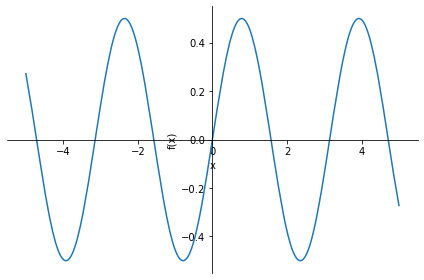

In [1]:
from sympy import *
from sympy.plotting import *

x = Symbol('x')
f = cos(x)*sin(x)
plot(f, (x,-5,5))

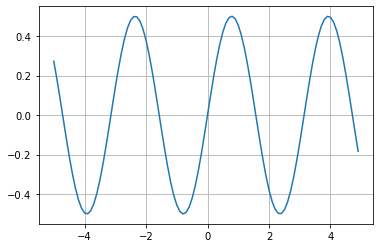

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5,5,0.1)
f = np.cos(x)*np.sin(x)

plt.plot(x, f)
plt.grid(True)
plt.show()

### 4.
Zeigen Sie die Vermutung aus Beispiel $2b)$ von Termin $3$ (*NumPy*) allgemeiner für beliebige $x$. 
Dafür erstellen Sie zuerst eine symbolische Matrix

$$B_{x} = 0.5∗ \begin{pmatrix} 
1 − \cos(x) & \sin(x) \\ 
 \sin(x) & 1 + \cos(x)
\end{pmatrix}$$

und vergleichen diese dann mit der vereinfachten Darstellung von $B^{2}_x$.

In [9]:
from sympy import *
import math

x = sympy.Symbol('x')
sympy.sin(x)

A = Matrix([ [1 - sympy.cos(x), sympy.sin(x)],
             [sympy.sin(x), 1 + sympy.cos(x)] ])
B = 0.5*A


In [10]:
B

Matrix([
[0.5 - 0.5*cos(x),       0.5*sin(x)],
[      0.5*sin(x), 0.5*cos(x) + 0.5]])

In [12]:
simplify(B**2)

Matrix([
[0.5 - 0.5*cos(x),       0.5*sin(x)],
[      0.5*sin(x), 0.5*cos(x) + 0.5]])

In [31]:
B == simplify(B**2)

True

Vergleichen Sie diese Lösung nun mit jener, die Sie damals mit *Numpy* erstellt haben. 


***

In [ ]:
import numpy as np

def A_x(x):
    a1 = 1 - np.cos(x)
    a2 = np.sin(x)
    a3 = 1 + np.cos(x)
    
    A = np.array([[a1, a2],[a2,a3]])
    return A

In [14]:
for n in np.arange(1,5):
    A_power, A_dot = potenzen(6,n)
    
    print('Matrix A_power with x = 6, n =', n, '\n', A_power)
    print('Matrix A_dot with x = 6, n =', n, '\n', A_dot, '\n-----------')

Matrix A_power with x = 6, n = 1 
 [[ 0.039829713349634  -0.2794154981989259]
 [-0.2794154981989259  1.9601702866503659]]
Matrix A_dot with x = 6, n = 1 
 [[ 0.039829713349634  -0.2794154981989259]
 [-0.2794154981989259  1.9601702866503659]] 
-----------
Matrix A_power with x = 6, n = 2 
 [[ 0.079659426699268  -0.5588309963978517]
 [-0.5588309963978517  3.9203405733007317]]
Matrix A_dot with x = 6, n = 2 
 [[ 0.079659426699268  -0.5588309963978517]
 [-0.5588309963978517  3.9203405733007317]] 
-----------
Matrix A_power with x = 6, n = 3 
 [[ 0.1593188533985359 -1.1176619927957032]
 [-1.1176619927957034  7.840681146601463 ]]
Matrix A_dot with x = 6, n = 3 
 [[ 0.1593188533985359 -1.1176619927957032]
 [-1.1176619927957034  7.840681146601463 ]] 
-----------
Matrix A_power with x = 6, n = 4 
 [[ 0.3186377067970718 -2.2353239855914064]
 [-2.2353239855914064 15.681362293202927 ]]
Matrix A_dot with x = 6, n = 4 
 [[ 0.3186377067970718 -2.235323985591406 ]
 [-2.235323985591407  15.681362293202

In [15]:

def potenzen_B(x,n):
    B = 0.5 * A_x(x)
    M1 = np.linalg.matrix_power(B,n)
    
    M2 = B.copy()
    for i in range(n-1):
        M2 = M2.dot(B)
    
    return M1, M2 

In [16]:
for n in np.arange(1,5):
    B_power, B_dot = potenzen_B(6,n)
    
    print('Matrix B_power with x = 6, n =', n, '\n', B_power)
    print('Matrix B_dot with x = 6, n =', n, '\n', B_dot, '\n-----------')

Matrix B_power with x = 6, n = 1 
 [[ 0.019914856674817  -0.1397077490994629]
 [-0.1397077490994629  0.9800851433251829]]
Matrix B_dot with x = 6, n = 1 
 [[ 0.019914856674817  -0.1397077490994629]
 [-0.1397077490994629  0.9800851433251829]] 
-----------
Matrix B_power with x = 6, n = 2 
 [[ 0.019914856674817  -0.1397077490994629]
 [-0.1397077490994629  0.9800851433251829]]
Matrix B_dot with x = 6, n = 2 
 [[ 0.019914856674817  -0.1397077490994629]
 [-0.1397077490994629  0.9800851433251829]] 
-----------
Matrix B_power with x = 6, n = 3 
 [[ 0.019914856674817  -0.1397077490994629]
 [-0.1397077490994629  0.9800851433251829]]
Matrix B_dot with x = 6, n = 3 
 [[ 0.019914856674817  -0.1397077490994629]
 [-0.1397077490994629  0.9800851433251829]] 
-----------
Matrix B_power with x = 6, n = 4 
 [[ 0.019914856674817  -0.1397077490994629]
 [-0.1397077490994629  0.9800851433251829]]
Matrix B_dot with x = 6, n = 4 
 [[ 0.019914856674817  -0.1397077490994629]
 [-0.1397077490994629  0.980085143325

In [17]:
#이거 틀렸네...x가 왜 6하나 뿐으로 출력됨?

for x in np.arange(1,5):
    for n in np.arange(1,3):
        B_power, B_dot = potenzen_B(x,n)
        
        print('Matrix B_power with x = 6, n =', n, '\n', B_power)
        print('Matrix B_dot with x = 6, n =', n, '\n', B_dot, '\n-----------')

Matrix B_power with x = 6, n = 1 
 [[0.2298488470659301 0.4207354924039483]
 [0.4207354924039483 0.7701511529340699]]
Matrix B_dot with x = 6, n = 1 
 [[0.2298488470659301 0.4207354924039483]
 [0.4207354924039483 0.7701511529340699]] 
-----------
Matrix B_power with x = 6, n = 2 
 [[0.2298488470659301 0.4207354924039483]
 [0.4207354924039483 0.7701511529340699]]
Matrix B_dot with x = 6, n = 2 
 [[0.2298488470659301 0.4207354924039483]
 [0.4207354924039483 0.7701511529340699]] 
-----------
Matrix B_power with x = 6, n = 1 
 [[0.7080734182735712 0.4546487134128409]
 [0.4546487134128409 0.2919265817264288]]
Matrix B_dot with x = 6, n = 1 
 [[0.7080734182735712 0.4546487134128409]
 [0.4546487134128409 0.2919265817264288]] 
-----------
Matrix B_power with x = 6, n = 2 
 [[0.7080734182735712 0.4546487134128409]
 [0.4546487134128409 0.2919265817264288]]
Matrix B_dot with x = 6, n = 2 
 [[0.7080734182735712 0.4546487134128409]
 [0.4546487134128409 0.2919265817264288]] 
-----------
Matrix B_pow

***

In [1]:
import numpy as np
import math, sympy
from sympy import *
from IPython.display import display, Latex

x = sympy.Symbol('x')

A = Matrix([ [1 - cos(x), sin(x)],
             [sin(x), 1 + cos(x)] ])
B = 0.5*A
B2 = simplify(B**2)

for n in range(1,5):
    print(f'x = {n}')
    display(Latex(r'$B_{x}$='),B.subs({x : n}).evalf())
    display(Latex(r'$B_{x}^{2}$='),B2.subs({x : n}).evalf())
    print('-----------------------')

x = 1


<IPython.core.display.Latex object>

Matrix([
[ 0.22984884706593, 0.420735492403948],
[0.420735492403948,  0.77015115293407]])

<IPython.core.display.Latex object>

Matrix([
[ 0.22984884706593, 0.420735492403948],
[0.420735492403948,  0.77015115293407]])

-----------------------
x = 2


<IPython.core.display.Latex object>

Matrix([
[0.708073418273571, 0.454648713412841],
[0.454648713412841, 0.291926581726429]])

<IPython.core.display.Latex object>

Matrix([
[0.708073418273571, 0.454648713412841],
[0.454648713412841, 0.291926581726429]])

-----------------------
x = 3


<IPython.core.display.Latex object>

Matrix([
[ 0.994996248300223,  0.0705600040299336],
[0.0705600040299336, 0.00500375169977727]])

<IPython.core.display.Latex object>

Matrix([
[ 0.994996248300223,  0.0705600040299336],
[0.0705600040299336, 0.00500375169977727]])

-----------------------
x = 4


<IPython.core.display.Latex object>

Matrix([
[ 0.826821810431806, -0.378401247653964],
[-0.378401247653964,  0.173178189568194]])

<IPython.core.display.Latex object>

Matrix([
[ 0.826821810431806, -0.378401247653964],
[-0.378401247653964,  0.173178189568194]])

-----------------------
